In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
df=pd.read_csv('D:/Data/Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
180,15685576,Male,26,16000,0
282,15750447,Male,37,70000,1
127,15745232,Male,26,32000,0
315,15594762,Female,39,75000,1
355,15606472,Male,60,34000,1


In [57]:
df=df.iloc[:,2:]

In [58]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [36]:
# X=df.iloc[:,0:-1]
# Y=df.iloc[:,-1]
X=df.drop(['Purchased'],axis='columns')
Y=df['Purchased']

In [37]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [38]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [40]:
X_train.shape

(280, 2)

In [41]:
X_train.head(5)

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [42]:
X_test.head(5)

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [43]:
scaler=StandardScaler()

In [44]:
# fit the scaler to train set,it will learn from parameter
scaler.fit(X_train)

StandardScaler()

In [45]:
#transfrom train and test  stes
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [46]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [47]:
# now transform into pandas dataframe
x_train_scaled=pd.DataFrame(X_train_scaler,columns=X_train.columns)
x_test_scaled=pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [48]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [49]:
# see above numpy array converted into pandas datafram

In [50]:
# Now test of standardization

In [51]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [52]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [53]:
# mean will be equal to 0 after scalling and standard daviation equal 1 

Text(0.5, 1.0, 'After Scale')

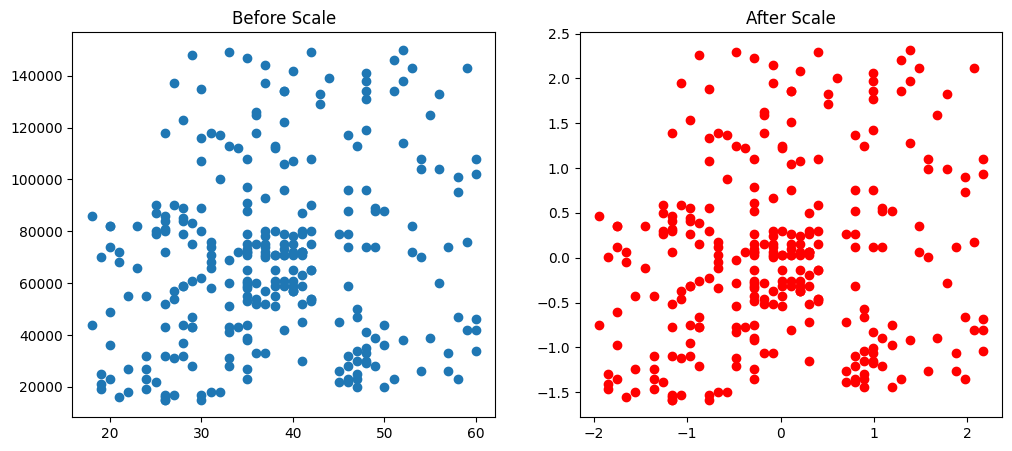

In [54]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scale')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scale')

<AxesSubplot:title={'center':'After Scalling'}, xlabel='Age', ylabel='Density'>

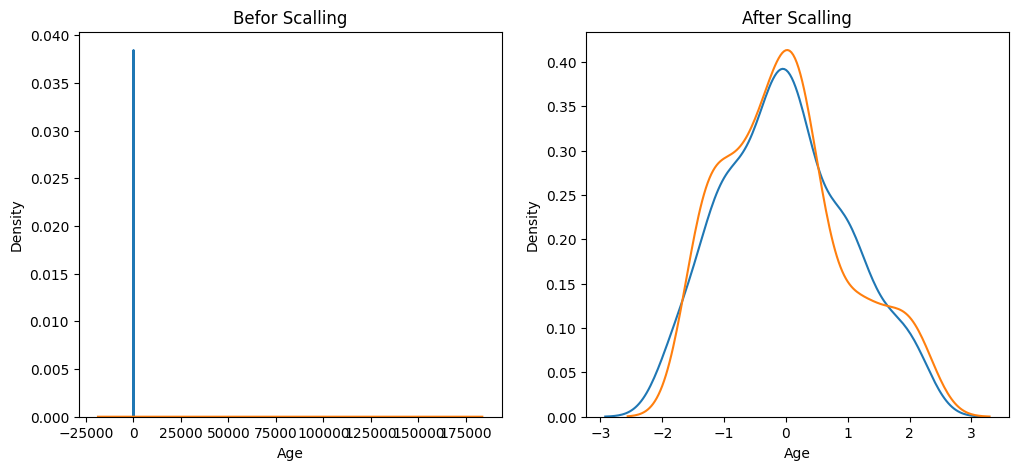

In [39]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Befor Scalling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('After Scalling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

In [40]:
#plot single age and salary

<AxesSubplot:title={'center':'Age Distribution After Scalling'}, xlabel='Age', ylabel='Density'>

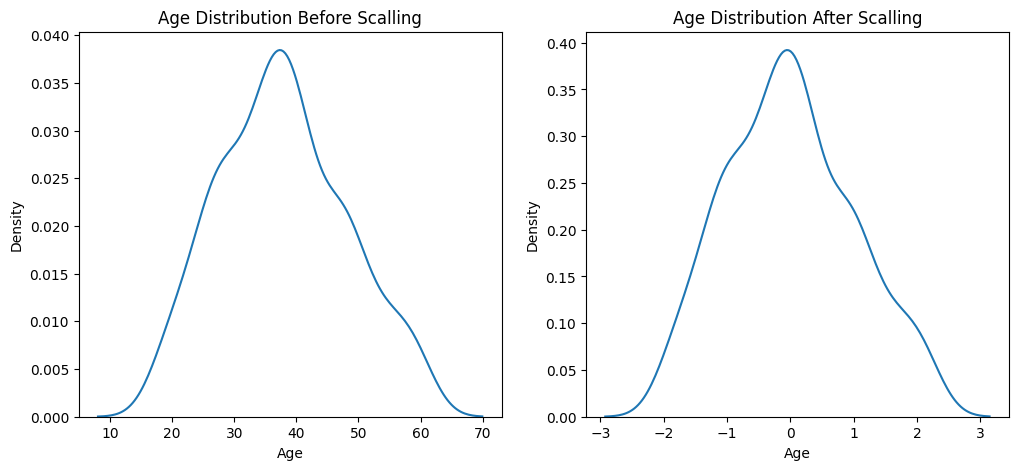

In [42]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Age Distribution Before Scalling")
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title("Age Distribution After Scalling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

<AxesSubplot:title={'center':'Salary Distribution After Scalling'}, xlabel='EstimatedSalary', ylabel='Density'>

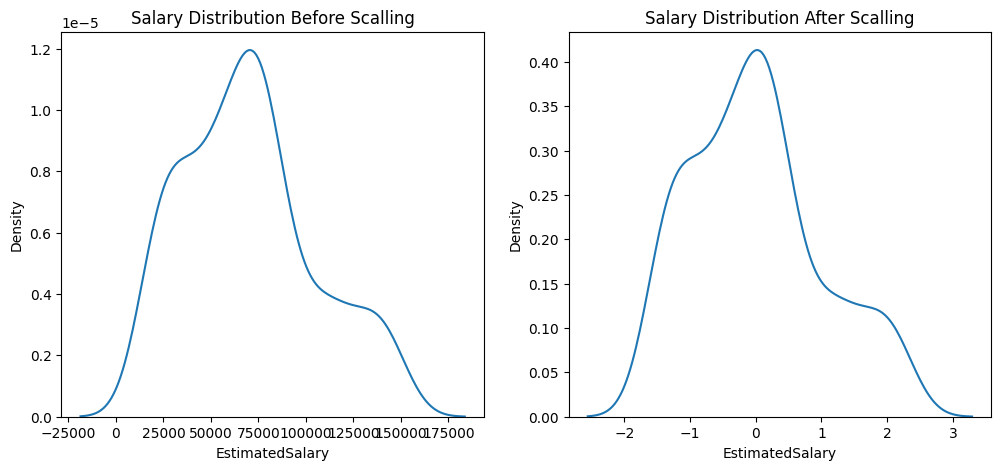

In [43]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Salary Distribution Before Scalling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title("Salary Distribution After Scalling")
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)

In [44]:
# Why Scalling is important ?

In [46]:
from sklearn.linear_model import LogisticRegression

In [49]:
model1=LogisticRegression()
model2=LogisticRegression()

In [50]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [51]:
model2.fit(x_train_scaled,Y_train)

LogisticRegression()

In [53]:
y_predict=model1.predict(X_test)
y_predic_scale=model2.predict(X_test_scaler)

C:\Users\Legend Sajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("Actual",accuracy_score(Y_test,y_predict))
print("Scaled",accuracy_score(Y_test,y_predic_scale))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [56]:
# Now apply on descision tree algorithm

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()

In [59]:
dt1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [60]:
dt2.fit(x_train_scaled,Y_train)

DecisionTreeClassifier()

In [61]:
y1=dt1.predict(X_test)
y2=dt2.predict(X_test_scaler)

C:\Users\Legend Sajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
print("Actual",accuracy_score(Y_test,y1))
print("Scaled",accuracy_score(Y_test,y2))

Actual 0.8666666666666667
Scaled 0.875


In [63]:
# Impact of outliers

In [59]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [60]:
new={'Age':[5,90,95],'EstimatedSalary':[100,250000,350000],'Purchased':[0,1,1]}

In [61]:
df0=df.append(pd.DataFrame(new))

C:\Users\Legend Sajan\AppData\Local\Temp\ipykernel_11988\1335873376.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df.append(pd.DataFrame(new))


In [62]:
df0

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,100,0
1,90,250000,1


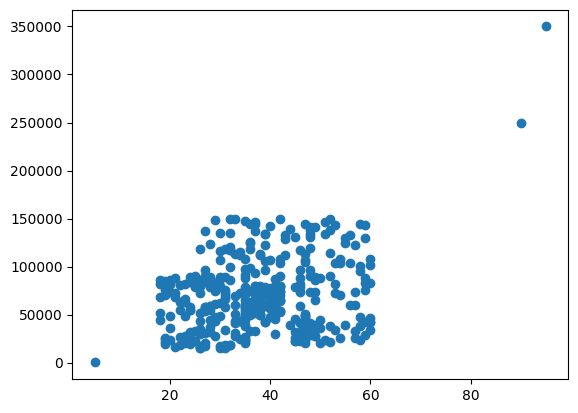

In [63]:
plt.scatter(df0['Age'],df0['EstimatedSalary'])

In [64]:
df0.sample(5)

,Age,EstimatedSalary,Purchased
199,35,22000,0
278,52,38000,1
113,37,55000,0
84,30,62000,0
265,42,108000,1


In [65]:
x=df0.drop(['Purchased'],axis='columns')
y=df0['Purchased']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [67]:
scaled=StandardScaler()

In [68]:
scaled.fit(x_train)

StandardScaler()

In [69]:
x_train_scale=scaled.transform(x_train)
x_test_scale=scaled.transform(x_test)

In [70]:
x_train_scale=pd.DataFrame(x_train_scale,columns=x_train.columns)
x_test_scale=pd.DataFrame(x_test_scale,columns=x_test.columns)

In [71]:
x_test_scale

,Age,EstimatedSalary
0,-0.287399,-1.335227
1,0.351481,0.166139
2,-0.561205,1.355900
3,-0.926279,0.506071
4,-1.291353,-0.315431
...,...,...
116,-0.287399,-1.250244
117,-0.378667,-1.250244
118,-0.287399,-0.542053
119,-0.104862,-0.343759


In [74]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,38.1,69135.1
std,11.0,35363.9
min,5.0,100.0
25%,30.0,43000.0
50%,37.0,68000.0
75%,46.0,86750.0
max,90.0,250000.0


In [75]:
np.round(x_train_scale.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-2.0
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1


Text(0.5, 1.0, 'After Scale')

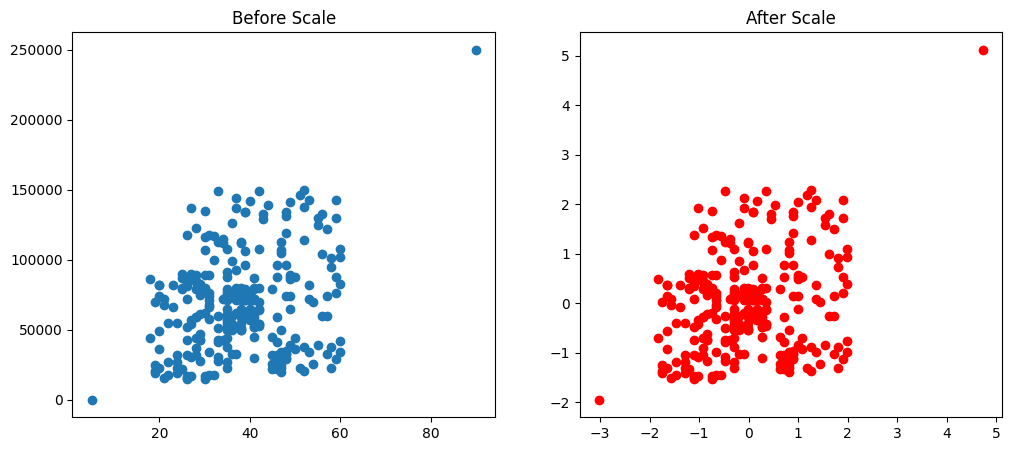

In [77]:
fig,(ax3,ax4)=plt.subplots(ncols=2,figsize=(12,5))
ax3.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax3.set_title('Before Scale')
ax4.scatter(x_train_scale['Age'],x_train_scale['EstimatedSalary'],color='red')
ax4.set_title('After Scale')